In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

from dataset import Dataset_per_file, Dataset_whole, Dataset_ori
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
from torch.autograd import Variable
import os
import numpy as np
from tqdm import tqdm
import argparse
import random
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import sys
import os
import matplotlib.pyplot as plt
from collections import OrderedDict


# ROC AUC

In [2]:
data_simband_ecg_2400 = [0.7629, 0.7628, 0.7715, 0.7673, 0.7487, 0.7733]
data_simband_ppg_2400 = [0.9185, 0.9092, 0.9208, 0.9194, 0.915, 0.9167]
data_ucla_ecg_2400 = [0.9138, 0.9097, 0.9125, 0.9196, 0.9264, 0.9037]
data_ucla_ppg_2400 = [0.9254, 0.9248, 0.9239, 0.9251, 0.9235, 0.9284]
data_staford_2400 = [0.8552, 0.853, 0.863, 0.8589, 0.8774, 0.8694]
# data_staford_goodquality_2400 = [0.9997, 0.9994, 0.9996, 0.998, 0.9994, 0.9995]
# data_staford_badquality_2400 = [0.792, 0.7881, 0.8011, 0.7964, 0.8233, 0.8115]

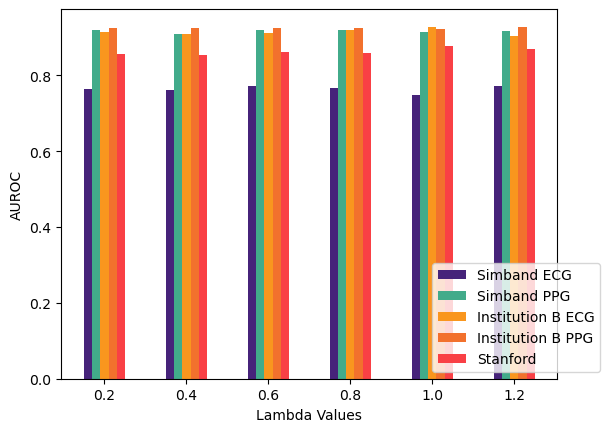

In [3]:
rsts_lst = [data_simband_ecg_2400, data_simband_ppg_2400, data_ucla_ecg_2400, data_ucla_ppg_2400, data_staford_2400]
datasets = ['Simband ECG', 'Simband PPG', 'Institution B ECG', 'Institution B PPG', 'Stanford']
lambdas = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
x_offset = [-0.2, -0.1, 0, 0.1, 0.2]
colors = ['#46237a', '#42ab8a', '#f9961e', '#f2712d', '#f94045']

for i in range(len(lambdas)):
    
    for j in range(len(rsts_lst)):
        if i == 0: legend = datasets[j]
        else: legend = None
        plt.bar(i+x_offset[j], rsts_lst[j][i], width=0.1, label=legend, color=colors[j])

plt.legend(bbox_to_anchor=(1.1, 0.0), loc='lower right')
plt.xticks(range(len(lambdas)), lambdas)
plt.xlabel('Lambda Values')
plt.ylabel('AUROC')
plt.savefig('AUROC_lambda_results.png', dpi=300)

# PR AUC

In [4]:
data_simband_ecg_2400 = [0.7327, 0.7401, 0.7532, 0.7447, 0.7341, 0.7577]
data_simband_ppg_2400 = [0.8741, 0.8546, 0.8754, 0.8752, 0.8672, 0.8713]
data_ucla_ecg_2400 = [0.7537, 0.7512, 0.7951, 0.7734, 0.7686, 0.8021]
data_ucla_ppg_2400 = [0.7393, 0.7356, 0.7971, 0.7626, 0.7769, 0.7926]
data_staford_2400 = [0.6706, 0.6779, 0.7046, 0.7083, 0.7306, 0.7031]
# data_staford_goodquality_2400 = [0.9997, 0.9994, 0.9996, 0.998, 0.9994, 0.9995]
# data_staford_badquality_2400 = [0.792, 0.7881, 0.8011, 0.7964, 0.8233, 0.8115]

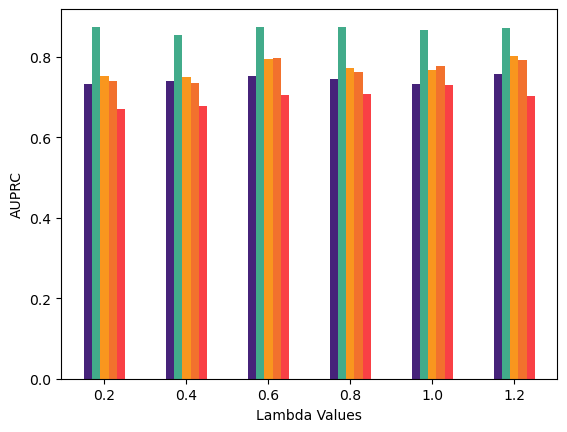

In [5]:
rsts_lst = [data_simband_ecg_2400, data_simband_ppg_2400, data_ucla_ecg_2400, data_ucla_ppg_2400, data_staford_2400]
datasets = ['Simband ECG', 'Simband PPG', 'Institution B ECG', 'Institution B PPG', 'Stanford']
lambdas = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
x_offset = [-0.2, -0.1, 0, 0.1, 0.2]
colors = ['#46237a', '#42ab8a', '#f9961e', '#f2712d', '#f94045']

for i in range(len(lambdas)):
    
    for j in range(len(rsts_lst)):
        if i == 0: legend = datasets[j]
        else: legend = None
        plt.bar(i+x_offset[j], rsts_lst[j][i], width=0.1, label=legend, color=colors[j])

# plt.legend(bbox_to_anchor=(1.32, 0.0), loc='lower right')
plt.xticks(range(len(lambdas)), lambdas)
plt.xlabel('Lambda Values')
plt.ylabel('AUPRC')
plt.savefig('AUPRC_lambda_results.png', dpi=300)